In [1]:
import tensorflow as tf
import plotly.express as px
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.applications.efficientnet import preprocess_input
import matplotlib.pyplot as plt
from utils import *
from PIL import Image
import os
from os import listdir

# Pré Process

In [5]:
directory = 'images/final/'
width = 96
height = 96
channels = 3
image_size = (width, height)
input_shape = (width, height, channels)
batch_size = 32

## Whitening & Resizing

In [ ]:


folders = listdir(directory)
# add to each folder the path to the folder
folders = [directory + folder for folder in folders]

for folder in folders:
    images = listdir(folder)
    for i, image in enumerate(images):
        image_path = folder + '/' + image
        img = Image.open(image_path)
        img = img.convert("RGBA")
        datas = img.getdata()

        newData = []
        for item in datas:
            # if Alpha is 0, then make RGB values 255, 255, 255, and Alpha 0
            if item[3] == 0:
                newData.append((255, 255, 255, 255))
            # if Alpha is 255, then keep the RGB values as they are, and Alpha 255
            elif item[3] == 255:
                newData.append(item)
            # if Alpha is between 0 and 255, then make RGB values 255, 255, 255, and Alpha 255
            else:
                newData.append((255, 255, 255, 255))
        # save the image with the new data
        img.putdata(newData)
        # resize the image
        img = img.resize(image_size)
        # replace the old image with the new image with same name as the old image
        # print(image_path)
        img.save(image_path)


## Pré Process Inputs CNN

In [2]:
import pandas as pd
import numpy as np


### Link w/ folder name and csv Name

In [3]:
import cv2

In [6]:
folders = listdir(directory)
image_folder_path = [directory + folder for folder in folders]
data_image = []
data_type = np.array([]).reshape(0, 2)
target = np.array([]).reshape(0, 6)
csv = 'PokeDataset.csv'
df = pd.read_csv(csv)

# order the df by alphabetical order of Name column
df = df.sort_values(by=['Name'])

# print(df.head())


# Iterate through the rows in the DataFrame
for index, row in df.iterrows():
    # append Type 1 and type 2 to data_type
    data_type = np.append(data_type, [[row['Type1'], row['Type2']]], axis=0)
    # append HP, Attack, Defense, Sp. Atk, Sp. Def, and Speed to target
    target = np.append(target, [[row['HP'], row['Attack'], row['Defense'], row['Sp. Atk'], row['Sp. Def'], row['Speed']]], axis=0)


# print(image_types)
# Iterate through the folders in the image folder
label = []
stats = []
for i,folder_name in enumerate(image_folder_path):
    pokemon_name = folder_name.split('/')[-1]
    if os.path.isdir(folder_name):

        for image in os.listdir(folder_name):
            #add to a new datadrame image, type1, type2 of the pokemon wich is the folder name use image_types dictionary
            image_path = folder_name + '/' + image
            print(image_path)
            image_data = cv2.imread(image_path)
            image_data = cv2.cvtColor(image_data, cv2.COLOR_BGR2RGB)
            # convert to numpy array
            image_data = np.array(image_data)
            # append the image to the data_image
            data_image.append(image_data)
            # append the label to the label list
            label.append(data_type[i])
            # append the stats to the stats list
            stats.append(target[i])

# convert data_image to numpy array
data_image = np.array(data_image)
# convert label to numpy array
label = np.array(label)
# convert stats to numpy array
stats = np.array(stats)

    

            
print(data_image.shape)
print(label.shape)
print(stats.shape)


images/final/Abomasnow/0.png
images/final/Abomasnow/1.png
images/final/Abomasnow/10.png
images/final/Abomasnow/11.png
images/final/Abomasnow/12.png
images/final/Abomasnow/13.png
images/final/Abomasnow/14.png
images/final/Abomasnow/15.png
images/final/Abomasnow/16.png
images/final/Abomasnow/17.png
images/final/Abomasnow/18.png
images/final/Abomasnow/19.png
images/final/Abomasnow/2.png
images/final/Abomasnow/20.png
images/final/Abomasnow/21.png
images/final/Abomasnow/22.png
images/final/Abomasnow/3.png
images/final/Abomasnow/4.png
images/final/Abomasnow/5.png
images/final/Abomasnow/6.png
images/final/Abomasnow/7.png
images/final/Abomasnow/8.png
images/final/Abomasnow/9.png
images/final/Abra/0.png
images/final/Abra/1.png
images/final/Abra/10.png
images/final/Abra/11.png
images/final/Abra/12.png
images/final/Abra/13.png
images/final/Abra/14.png
images/final/Abra/15.png
images/final/Abra/16.png
images/final/Abra/17.png
images/final/Abra/2.png
images/final/Abra/3.png
images/final/Abra/4.png


In [7]:
# normalize the data_image and stats
# min max scaler
data_image = data_image / 255

# standard scaler
stats_mean = stats.mean(axis=0)
stats_std = stats.std(axis=0)
stats = (stats - stats_mean ) / stats_std



In [8]:
len(data_image)

13849

In [9]:
type_dict = {'Normal': 0, 'Fire': 1, 'Water': 2, 'Electric': 3, 'Grass': 4, 'Ice': 5, 'Fighting': 6, 'Poison': 7, 'Ground': 8, 'Flying': 9, 'Psychic': 10, 'Bug': 11, 'Rock': 12, 'Ghost': 13, 'Dragon': 14, 'Dark': 15, 'Steel': 16, 'Fairy': 17}

In [10]:
one_hot = np.zeros((len(data_image), 18))
for i in range(len(data_image)):   
    one_hot[i, type_dict[label[i][0]]] = 1
    if label[i][1] != 'nan':
        one_hot[i, type_dict[label[i][1]]] = 1

print(one_hot)



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
folders = listdir(directory)
image_folder_path = [directory + folder for folder in folders]
# count how many image in total
count = 0
for folder_name in image_folder_path:
    pokemon_name = folder_name.split('/')[-1]
    if os.path.isdir(folder_name):
        if pokemon_name not in df['Name'].unique():
            print(f"Error: No corresponding name in the df DataFrame for folder '{pokemon_name}'")

   

### One Hot Encoding

In [24]:
print(len(one_hot))

13849


In [11]:
# sample 80% of the data for training
train_size = int(len(data_image) * 0.8)

test_size = int(len(data_image) * 0.2)

#select train size indices randomly from the data
train_indices = np.random.choice(len(data_image), size=train_size, replace=False)

#select the remaining indices for test
test_indices = np.array(list(set(range(len(data_image))) - set(train_indices)))

#split the data into train and test
train_data = data_image[train_indices]
train_label = one_hot[train_indices]
train_stats = stats[train_indices]

test_data = data_image[test_indices]
test_label = one_hot[test_indices]
test_stats = stats[test_indices]


print(train_data.shape)
print(train_label.shape)
print(train_stats.shape)

print(test_data.shape)
print(test_label.shape)
print(test_stats.shape)







(11079, 96, 96, 3)
(11079, 18)
(11079, 6)
(2770, 96, 96, 3)
(2770, 18)
(2770, 6)


In [39]:
train_stats[0]

array([0.44815294, 0.84133277, 0.32047897, 0.3280149 , 0.35057935,
       1.18274778])

## Define the CNN

In [42]:
# define two sets of inputs: the images and the categorical inputs type1 and type2
image_input = tf.keras.layers.Input(shape=input_shape, name='image_input')
category_input = tf.keras.layers.Input(shape=(18,), name='category_input')

# define the first branch of the CNN -- the image branch
# downsize the image from 96x96x3 to 24x24x4
x = tf.keras.layers.Conv2D(3, (3, 3), strides=(2, 2), padding='same')(image_input)
# downsize the image from 24x24x4 to 12x12x8
x = tf.keras.layers.Conv2D(8, (3, 3), strides=(2, 2), padding='same')(x)
# downsize the image from 12x12x8 to 6x6x16
x = tf.keras.layers.Conv2D(16, (3, 3), strides=(2, 2), padding='same')(x)
# flatten the image from 6x6x16 to 576x16
x = tf.keras.layers.Flatten()(x)

# define the second branch of the CNN -- the categorical branch
# 18 categories plus 2 of these mixed categories is 171 combinations of type1 and type2
# upsize the categorical input from 2 to attaining 256
y = tf.keras.layers.Dense(256, activation='relu')(category_input)

# merge the output of the two branches
z = tf.keras.layers.concatenate([x, y])

# define the output of the model as the output of the final Dense layer
output = tf.keras.layers.Dense(6, activation='linear')(z)

# define the model with two inputs and one output
model = tf.keras.Model(inputs=[image_input, category_input], outputs=output)

# compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])


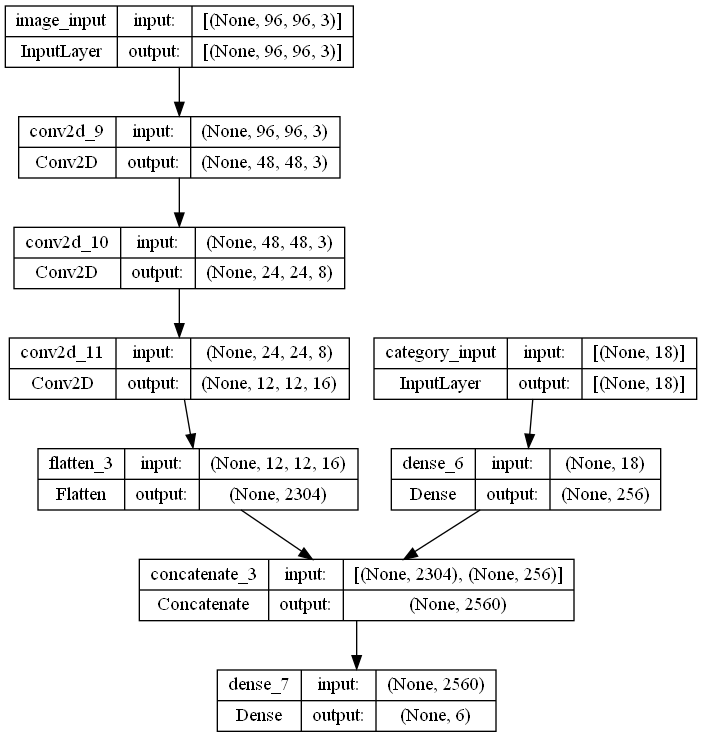

In [34]:
# plot the model
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [43]:
#fit with train and test
history = model.fit([train_data, train_label], train_stats, epochs=200, batch_size=32, validation_data=([test_data, test_label], test_stats))

Epoch 1/200
347/347 [==============================] - 3s 6ms/step - loss: 0.8562 - mae: 0.7243 - val_loss: 0.7391 - val_mae: 0.6622
Epoch 2/200
347/347 [==============================] - 2s 5ms/step - loss: 0.7292 - mae: 0.6613 - val_loss: 0.7005 - val_mae: 0.6391
Epoch 3/200
347/347 [==============================] - 2s 5ms/step - loss: 0.6767 - mae: 0.6327 - val_loss: 0.6702 - val_mae: 0.6248
Epoch 4/200
347/347 [==============================] - 2s 5ms/step - loss: 0.6395 - mae: 0.6121 - val_loss: 0.6558 - val_mae: 0.6212
Epoch 5/200
347/347 [==============================] - 2s 5ms/step - loss: 0.6118 - mae: 0.5969 - val_loss: 0.6426 - val_mae: 0.6060
Epoch 6/200
347/347 [==============================] - 2s 5ms/step - loss: 0.5898 - mae: 0.5848 - val_loss: 0.6308 - val_mae: 0.5993
Epoch 7/200
347/347 [==============================] - 2s 5ms/step - loss: 0.5698 - mae: 0.5732 - val_loss: 0.6297 - val_mae: 0.6020
Epoch 8/200
347/347 [==============================] - 2s 5ms/step - 

In [45]:
#evaluate the model
model.evaluate([test_data, test_label], test_stats)

87/87 [==============================] - 0s 3ms/step - loss: 0.7944 - mae: 0.6474


[0.7944310307502747, 0.6473527550697327]

In [36]:

def predict_and_plot(model,image,type,stats,indice):
    # predict the stats
    image = image[indice:indice+1]
    type = type[indice:indice+1]
    stats = stats[indice:indice+1]
    prediction = model.predict([image, type])
    prediction = prediction * stats_std + stats_mean
    # plot the image

    # plt.imshow(image[0])
    # plt.show()
    # # print the prediction
    # print("The prediction is:")
    # print(prediction)
    # print the actual stats
    # print("The actual stats are:")
    stats = stats[0] * stats_std + stats_mean
    # print(stats)
    # print("The difference is:", np.sum(abs(prediction - stats)))

    return np.sum(abs(prediction - stats))
    


In [53]:
train_label[0:1]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 0.]])

In [61]:
model.predict([test_data[666:667],np.array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.]])]) * stats_std + stats_mean

1/1 [==============================] - 0s 9ms/step


array([[101.84117776, 103.46809709, 160.61455854, 210.33500957,
        120.18293311, 117.74726087]])

[array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        ...,

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]]]), array([[0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,

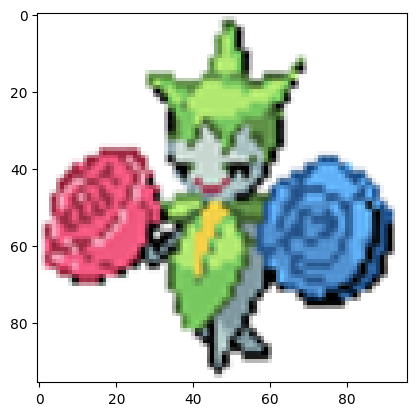

The prediction is:
[[ 55.85007717  95.00872047  54.10701918 112.27793765  63.23880548
   26.76083161]]
The actual stats are:
[ 50.  60.  45. 100.  80.  65.]
The difference is: 117.2441173831082


In [79]:
predict_and_plot(model, test_data, test_label, test_stats,666)

## test model enzo

In [66]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input, concatenate
from sklearn.model_selection import train_test_split

# Input layer for the image
image_input = Input(shape=(96, 96, 3))
category_input = tf.keras.layers.Input(shape=(18,), name='category_input')

# Convolutional layers for the image
conv1 = Conv2D(32, (3, 3), activation='relu')(image_input)
pool1 = MaxPooling2D((2, 2))(conv1)
conv2 = Conv2D(64, (3, 3), activation='relu')(pool1)
pool2 = MaxPooling2D((2, 2))(conv2)
conv3 = Conv2D(128, (3, 3), activation='relu')(pool2)
pool3 = MaxPooling2D((2, 2))(conv3)
flatten = Flatten()(pool3)

# Dense layers for the image
dense1 = Dense(128, activation='relu')(flatten)
dense2 = Dense(64, activation='relu')(dense1)
flatten = Flatten()(dense2)


# Dense layers for the categorical input
dense3 = Dense(256, activation='relu')(category_input)

# Merge the two branches
merge = concatenate([flatten, dense3])

# Output layer
output = Dense(6, activation='linear')(merge)




model_enzo = Model(inputs=[image_input, category_input], outputs=output)

# compile the model
model_enzo.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])



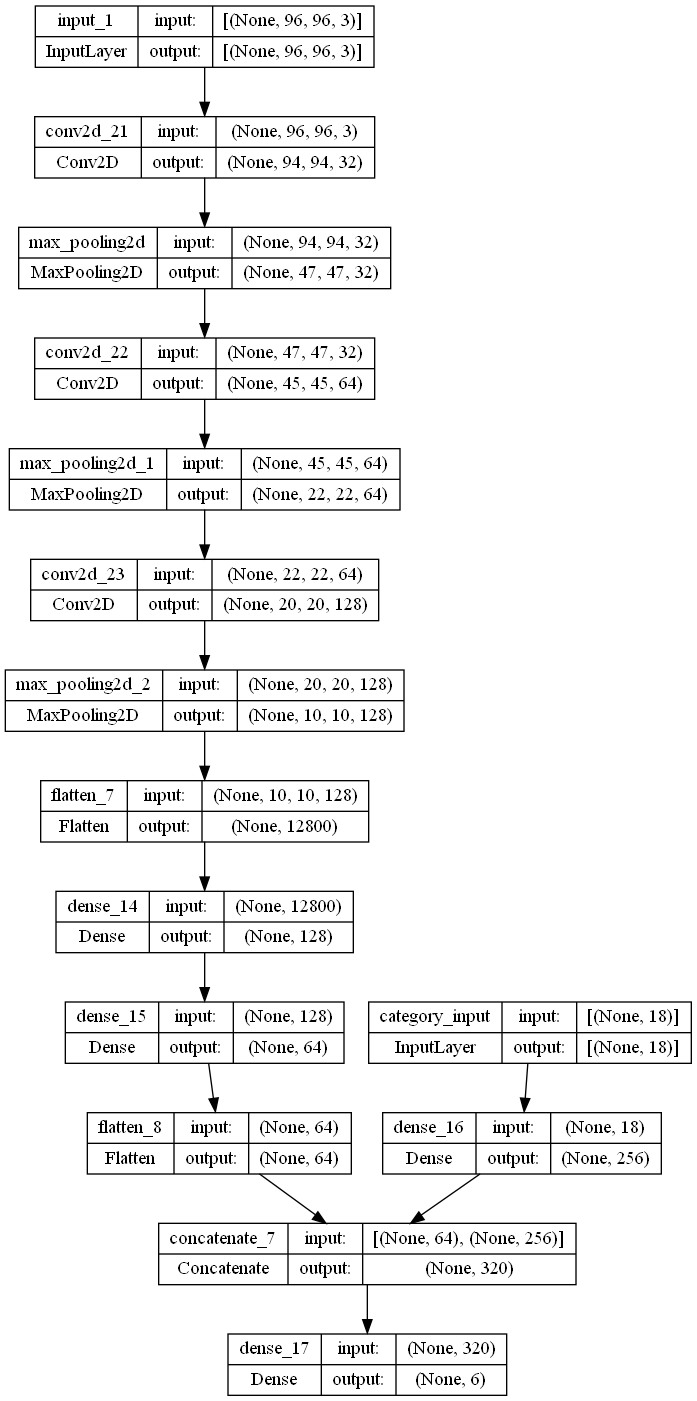

In [67]:
tf.keras.utils.plot_model(model_enzo, show_shapes=True, show_layer_names=True)

In [68]:
model_enzo.fit([train_data, train_label], train_stats, epochs=50, batch_size=32, validation_data=([test_data, test_label], test_stats))

Epoch 1/50
347/347 [==============================] - 6s 14ms/step - loss: 0.7862 - mae: 0.6889 - val_loss: 0.6750 - val_mae: 0.6330
Epoch 2/50
347/347 [==============================] - 4s 11ms/step - loss: 0.6428 - mae: 0.6106 - val_loss: 0.5963 - val_mae: 0.5789
Epoch 3/50
347/347 [==============================] - 4s 12ms/step - loss: 0.5555 - mae: 0.5619 - val_loss: 0.5425 - val_mae: 0.5477
Epoch 4/50
347/347 [==============================] - 4s 12ms/step - loss: 0.4598 - mae: 0.5079 - val_loss: 0.5011 - val_mae: 0.5311
Epoch 5/50
347/347 [==============================] - 4s 12ms/step - loss: 0.3637 - mae: 0.4510 - val_loss: 0.4558 - val_mae: 0.5003
Epoch 6/50
347/347 [==============================] - 4s 12ms/step - loss: 0.2803 - mae: 0.3944 - val_loss: 0.4332 - val_mae: 0.4818
Epoch 7/50
347/347 [==============================] - 4s 12ms/step - loss: 0.2149 - mae: 0.3456 - val_loss: 0.4024 - val_mae: 0.4602
Epoch 8/50
347/347 [==============================] - 4s 11ms/step - 

In [21]:
# import load_model from keras
from tensorflow.keras.models import load_model

model = load_model('model_statistiques.h5')

In [16]:
import random

1/1 [==============================] - 0s 33ms/step


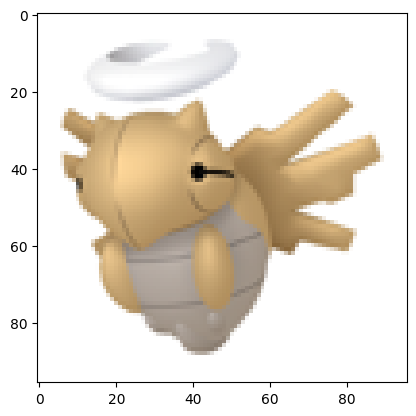

The prediction is:
[[ 3.00947209 93.19663353 45.50838785 32.73303334 32.3550095  38.75190385]]
The actual stats are:
[ 1. 90. 45. 30. 30. 40.]
The difference is: 12.050632446429198
1/1 [==============================] - 0s 32ms/step


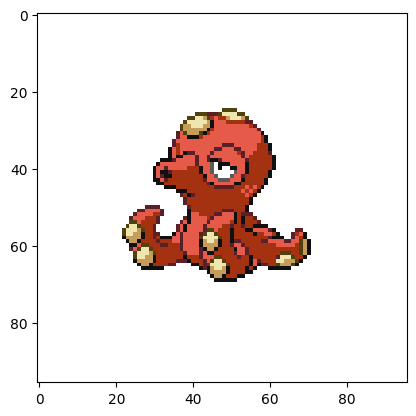

The prediction is:
[[ 69.89348505 107.26468174  71.98513343 106.32015462  75.29688186
   45.69217878]]
The actual stats are:
[ 75. 105.  75. 105.  75.  45.]
The difference is: 12.695278524382822
1/1 [==============================] - 0s 26ms/step


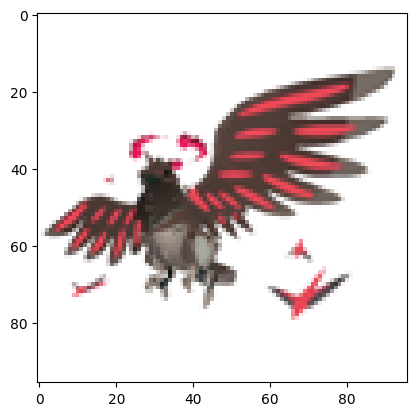

The prediction is:
[[96.59447798 89.26541397 98.08889943 57.14355985 81.63259818 62.28798589]]
The actual stats are:
[ 98.  87. 105.  53.  85.  67.]
The difference is: 22.80501234940288
1/1 [==============================] - 0s 24ms/step


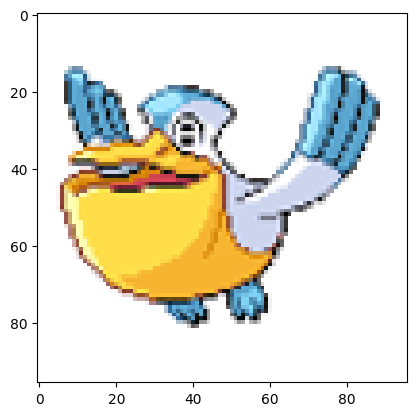

The prediction is:
[[56.31659584 58.19862966 82.97405286 68.28836617 82.16639881 96.08643261]]
The actual stats are:
[ 60.  50. 100.  85.  70.  65.]
The difference is: 88.87244622467017
1/1 [==============================] - 0s 25ms/step


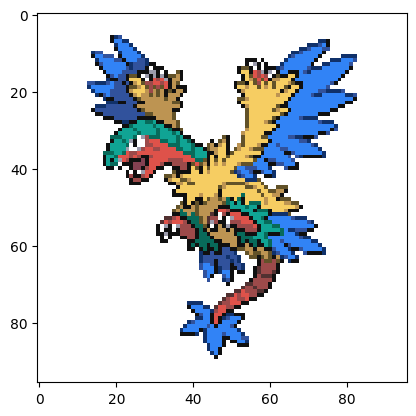

The prediction is:
[[ 79.07670876 127.58864324  80.0818546  129.56387047  69.06133759
  102.31930172]]
The actual stats are:
[ 75. 140.  65. 112.  65. 110.]
The difference is: 60.87582645889647
1/1 [==============================] - 0s 22ms/step


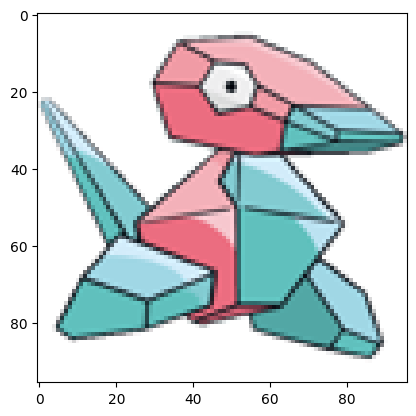

The prediction is:
[[60.73107255 59.77227576 74.90909385 88.67074796 76.75722652 45.27618237]]
The actual stats are:
[65. 60. 70. 85. 75. 40.]
The difference is: 20.109902381590473
1/1 [==============================] - 0s 24ms/step


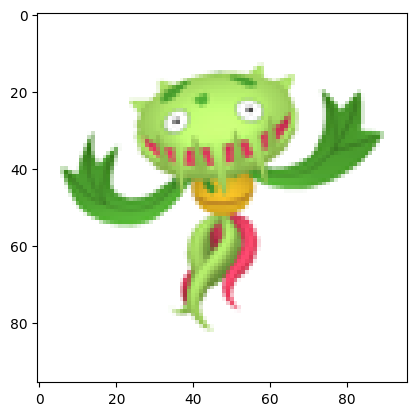

The prediction is:
[[82.78132969 95.99490034 75.73945786 90.11843821 65.03267645 44.23665728]]
The actual stats are:
[ 74. 100.  72.  90.  72.  46.]
The difference is: 25.374991688048937
1/1 [==============================] - 0s 28ms/step


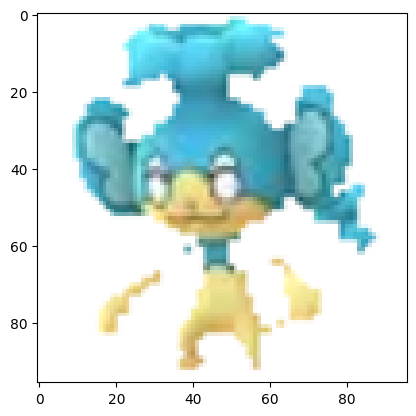

The prediction is:
[[46.56070078 52.90059342 49.1344619  54.62230826 47.88124461 64.28945605]]
The actual stats are:
[50. 53. 48. 53. 48. 64.]
The difference is: 6.703687396972718
1/1 [==============================] - 0s 22ms/step


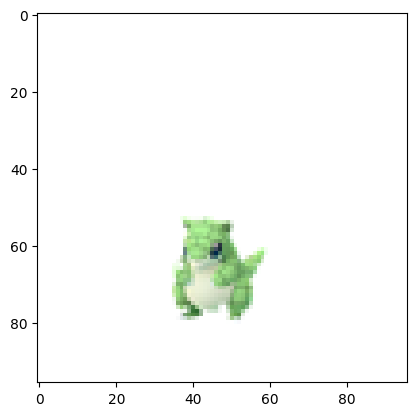

The prediction is:
[[49.80087942 78.68423373 83.26010615 18.93675236 28.83010307 46.15712785]]
The actual stats are:
[50. 75. 85. 20. 30. 40.]
The difference is: 14.013520590555466
1/1 [==============================] - 0s 24ms/step


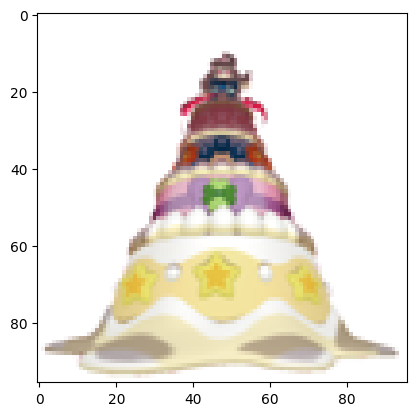

The prediction is:
[[ 64.73258723  60.80454727  73.79623952 113.09585023 121.62595228
   64.59166971]]
The actual stats are:
[ 65.  60.  75. 110. 121.  64.]
The difference is: 6.589192732047948


In [32]:
val_pred = 10
for i in range(10):
    if val_pred > 2:
        val_pred = predict_and_plot(model, test_data, test_label,test_stats, random.randint(0, 1000))
    else:
        break


In [48]:
diff= 0
diffs = []
for i in range(2500):
    dif =  predict_and_plot(model, test_data, test_label, test_stats,i)
    diff += dif
    diffs.append(dif)


print(diff/2500)
print("median",np.median(diffs))

1/1 [==============================] - 0s 35ms/step
24.42207158448436
median 15.475578196315553


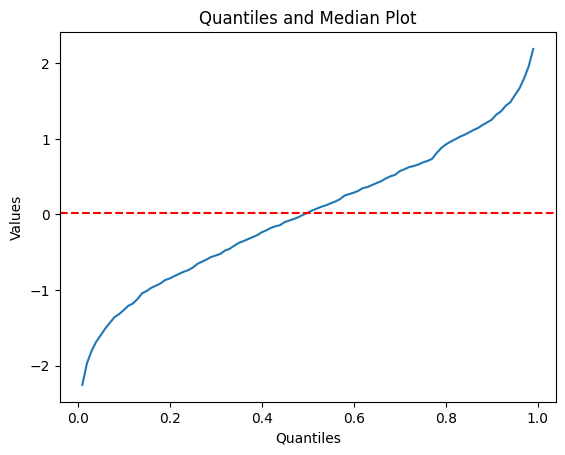

In [46]:
import numpy as np
import matplotlib.pyplot as plt


# Calculate the quantiles
quantiles = np.arange(0.01, 1.0, 0.01)
values = np.quantile(diffs, quantiles)

# Plot the quantiles as a curve
plt.plot(quantiles, values)

# Plot the median as a horizontal line
median = np.median(diffs)
plt.axhline(y=median, color='r', linestyle='--')

# Add labels and title
plt.xlabel('Quantiles')
plt.ylabel('Values')
plt.title('Quantiles and Median Plot')

# Show the plot
plt.show()


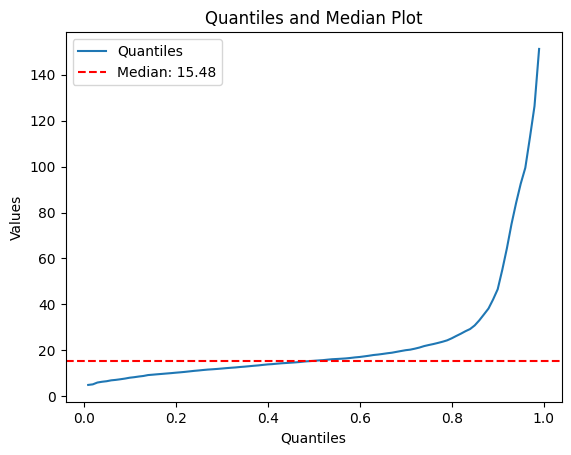

In [49]:
import numpy as np
import matplotlib.pyplot as plt



# Calculate the quantiles
quantiles = np.arange(0.01, 1.0, 0.01)
values = np.quantile(diffs, quantiles)

# Plot the quantiles as a curve
plt.plot(quantiles, values, label='Quantiles')

# Plot the median as a horizontal line
median = np.median(diffs)
plt.axhline(y=median, color='r', linestyle='--', label=f'Median: {median:.2f}')

# Add labels, title, and legend
plt.xlabel('Quantiles')
plt.ylabel('Values')
plt.title('Quantiles and Median Plot')
plt.legend()

# Show the plot
plt.show()


In [57]:
#quantil 75% 90 95 99 of diffs
print("quantil 75%",np.quantile(diffs,0.75))
print("quantil 80%",np.quantile(diffs,0.90))
# 83 
print("quantil 83%",np.quantile(diffs,0.90))
print("quantil 85%",np.quantile(diffs,0.95))
print("quantil 90%",np.quantile(diffs,0.99))


quantil 75% 22.34743174983064
quantil 80% 46.624358660298135
quantil 83% 46.624358660298135
quantil 85% 92.50825670478638
quantil 90% 151.18596121650836


In [12]:
model_enzo.save('model_statistiques.h5')

NameError: name 'model_enzo' is not defined

## Modèles indépendants

In [16]:
predict_and_plot(model_enzo, test_data, test_label, test_stats,666)

NameError: name 'model_enzo' is not defined

### MLP

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense

def create_mlp(dim, regularizer=None):
    """Creates a simple two-layer MLP with inputs of the given dimension"""
    model = Sequential()
    model.add(Dense(256, activation="relu", kernel_regularizer=regularizer))
    return model

## 